# LOADING AND EXPLORING THE DATASET

In [1]:
#Importing pandas as pd and loading the owid-covid-data.csv
import pandas as pd

try:
   df = pd.read_csv('owid-covid-data.csv')
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

In [2]:
# Checking the columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
# Preview of the rows
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [4]:
df.info()
# Identifying the missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   333420 non-null  object 
 2   location                                    350085 non-null  object 
 3   date                                        350085 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64

# CLEANING THE DATA

In [5]:
# Filtering countries of interest i.e. most populated country per continent
countries = ['India', 'United States', 'Nigeria', 'Brazil', 'Germany', 'Australia']
df = df[df['location'].isin(countries)]
df.isnull().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                 185
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       7703
excess_mortality_cumulative                7703
excess_mortality                           7703
excess_mortality_cumulative_per_million    7703
Length: 67, dtype: int64

In [6]:
# No rows with missing dates/critical values... Proceeding to convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.head()

iso_code continent   location       date  total_cases  new_cases  \
18020      AUS   Oceania  Australia 2020-01-03          NaN        0.0   
18021      AUS   Oceania  Australia 2020-01-04          NaN        0.0   
18022      AUS   Oceania  Australia 2020-01-05          NaN        0.0   
18023      AUS   Oceania  Australia 2020-01-06          NaN        0.0   
18024      AUS   Oceania  Australia 2020-01-07          NaN        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
18020                 NaN           NaN         0.0                  NaN  ...   
18021                 NaN           NaN         0.0                  NaN  ...   
18022                 NaN           NaN         0.0                  NaN  ...   
18023                 NaN           NaN         0.0                  NaN  ...   
18024                 NaN           NaN         0.0                  NaN  ...   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
18020          16.5                     NaN                        3.84   
18021          16.5                     NaN                        3.84   
18022          16.5                     NaN                        3.84   
18023          16.5                     NaN                        3.84   
18024          16.5                     NaN                        3.84   

       life_expectancy  human_development_index  population  \
18020            83.44                    0.944  26177410.0   
18021            83.44                    0.944  26177410.0   
18022            83.44                    0.944  26177410.0   
18023            83.44                    0.944  26177410.0   
18024            83.44                    0.944  26177410.0   

       excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
18020                                   NaN                          NaN   
18021                                   NaN                          NaN   
18022                                 -42.7                        -1.44   
18023                                   NaN                          NaN   
18024                                   NaN                          NaN   

       excess_mortality  excess_mortality_cumulative_per_million  
18020               NaN                                      NaN  
18021               NaN                                      NaN  
18022             -1.44                                -1.663417  
18023               NaN                                      NaN  
18024               NaN                                      NaN  

[5 rows x 67 columns]

In [7]:
# Confirming the selected countries by checking the unique values in the location column
sorted(df['location'].unique())

['Australia', 'Brazil', 'Germany', 'India', 'Nigeria', 'United States']

In [8]:
# Handling missing values using fillna()
df.fillna(0, inplace=True)  # Replaces missing values with 0
df.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
population                                 0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64

# COVID 19 DATA ANALYSIS
## Analysis of total cases over time

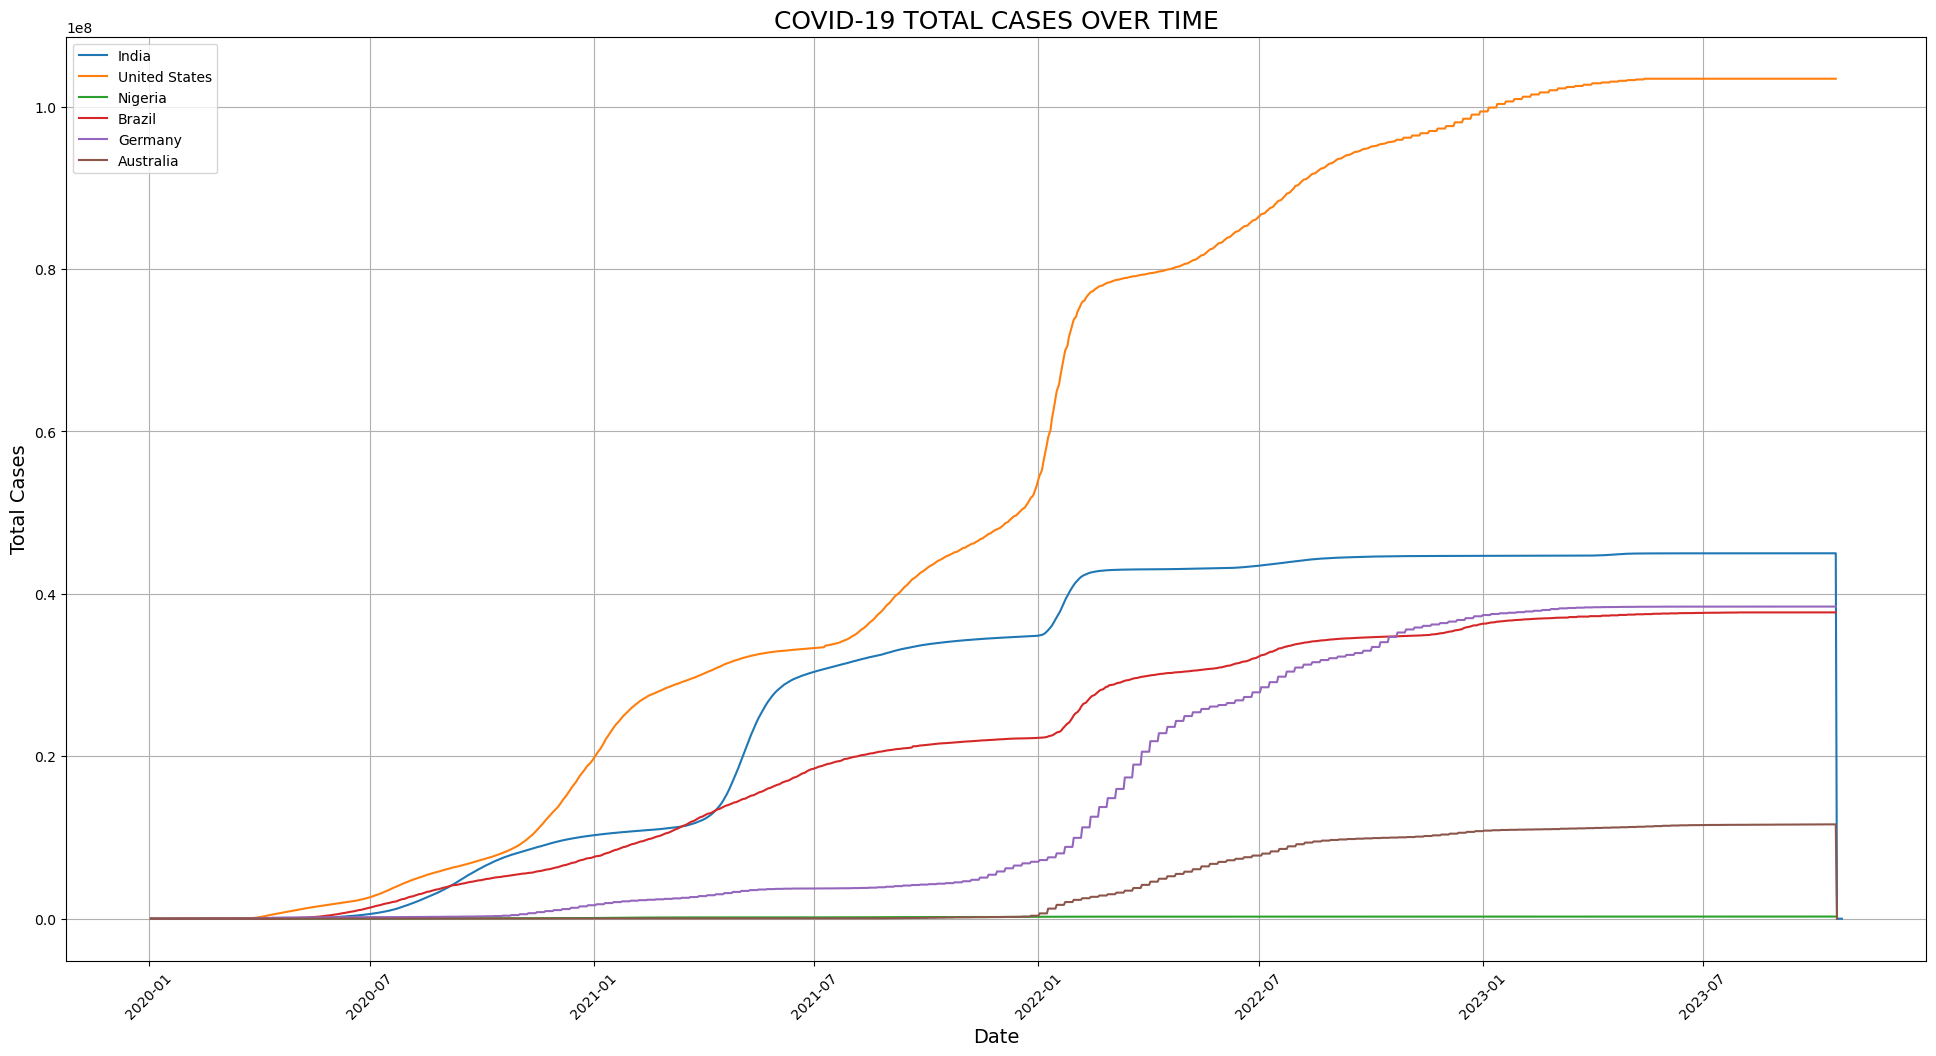

<Figure size 640x480 with 0 Axes>

In [10]:
# EXPLORATORY DATA ANALYSIS
# Plotting a line chart of total cases over time for selected countries.
import matplotlib.pyplot as plt

# Filter data for the specified countries
df_selected = df[df['location'].isin(countries)]

plt.figure(figsize=(24, 12))  # Set figure size

# Loop through each country and plot total cases over time
for country in countries:
    subset = df_selected[df_selected['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

# Customizing the plot
plt.xlabel('Date', fontsize=14)  # Set font size and type
plt.ylabel('Total Cases', fontsize=14)
plt.title('COVID-19 TOTAL CASES OVER TIME', fontsize=18)
plt.xticks(rotation=45)  # Rotating date labels for readability
plt.legend()  # Adding legend for clarity
plt.grid(True)  # Enabling grid for better visibility
plt.show()
plt.savefig("total_cases_chart.png")

### Inferences

The comparative line graph of total cases against time shows that:

1. **USA** had the highest growth of COVID-19 cases over time, while **Nigeria** had the lowest

2. The total cases *increased significantly* at the beginning of the year 2022.

3. The total cases reported in **Nigeria** was considerably low. This could be attributed to poor recording or reporting mechanisms. 

## Analysis of Total Deaths over Time
### Plot

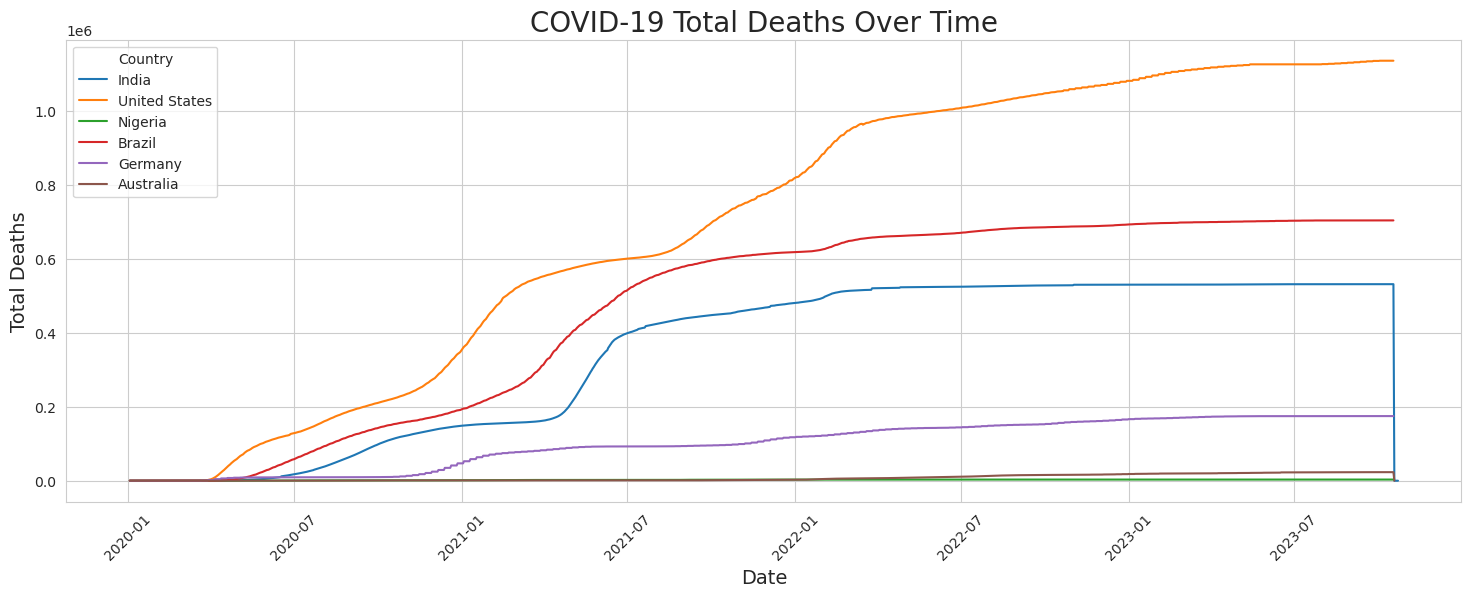

<Figure size 640x480 with 0 Axes>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Filter data for the specified countries
df_selected = df[df['location'].isin(countries)]

plt.figure(figsize=(18, 6))  # Set figure size

# Loop through each country and plot total deaths over time using Seaborn
for country in countries:
    subset = df_selected[df_selected['location'] == country]
    sns.lineplot(x=subset['date'], y=subset['total_deaths'], label=country)

# Customizing the plot
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.title('COVID-19 Total Deaths Over Time', fontsize=20)
plt.xticks(rotation=45)  # Rotating date labels for readability
plt.legend(title="Country")  # Adding legend for clarity
plt.show()
plt.savefig("total_deaths_chart.png")


### Inferences

- The graph for the trend in COVID-19 deaths is almost similar to the graph for total cases against time.

- The only exception is in the trend for Brazil, which shows an increased number of deaths as compared to the total cases trend.

- *Nigeria and Australia* had a **lower growth** of total deaths, when compared to *USA, Germany, Brazil and India*.

## Analysis of New Cases over Time
### Plot

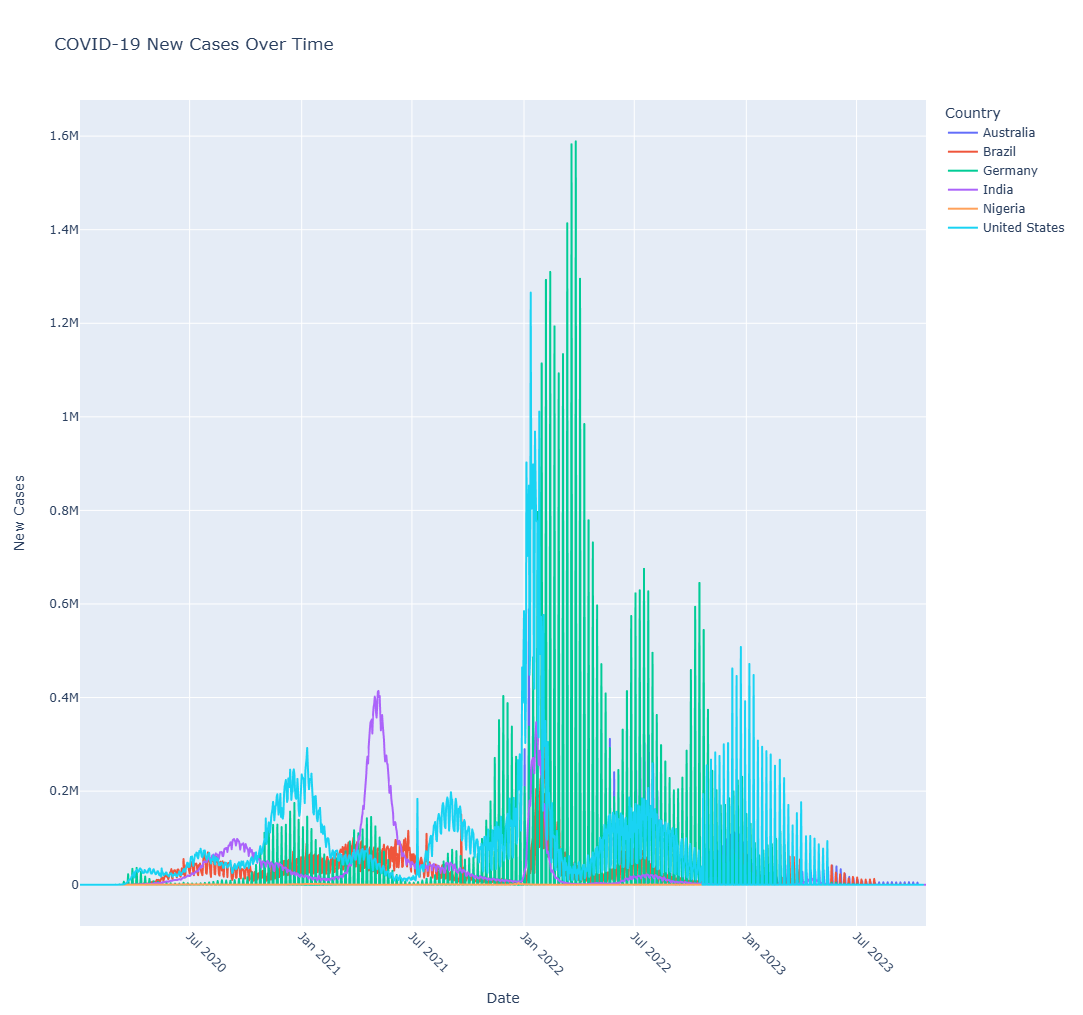

In [12]:

import plotly.express as px

# Filter data for the specified countries
df_selected = df[df['location'].isin(countries)]

# Create an interactive line plot
fig = px.line(df_selected, x='date', y='new_cases', color='location', 
              title="COVID-19 New Cases Over Time")

# Set the figure size to fullscreen
fig.update_layout(xaxis_title="Date", yaxis_title="New Cases",
                  xaxis=dict(tickangle=45),
                  legend_title="Country",
                  height=1000,  # Adjust height for fullscreen effect
                  width=1400)  # Adjust width for fullscreen effect

# Show the interactive plot
fig.show()


### Inferences

1. Germany Experienced a spike in new infections between January and June 2022.
   
2. India experienced a surge in infections between January and July 2021.

3. Nigeria and Australia had lower numbers of new cases when compared to the other countries.

## Analysis of the Death Rate over time
### Plot

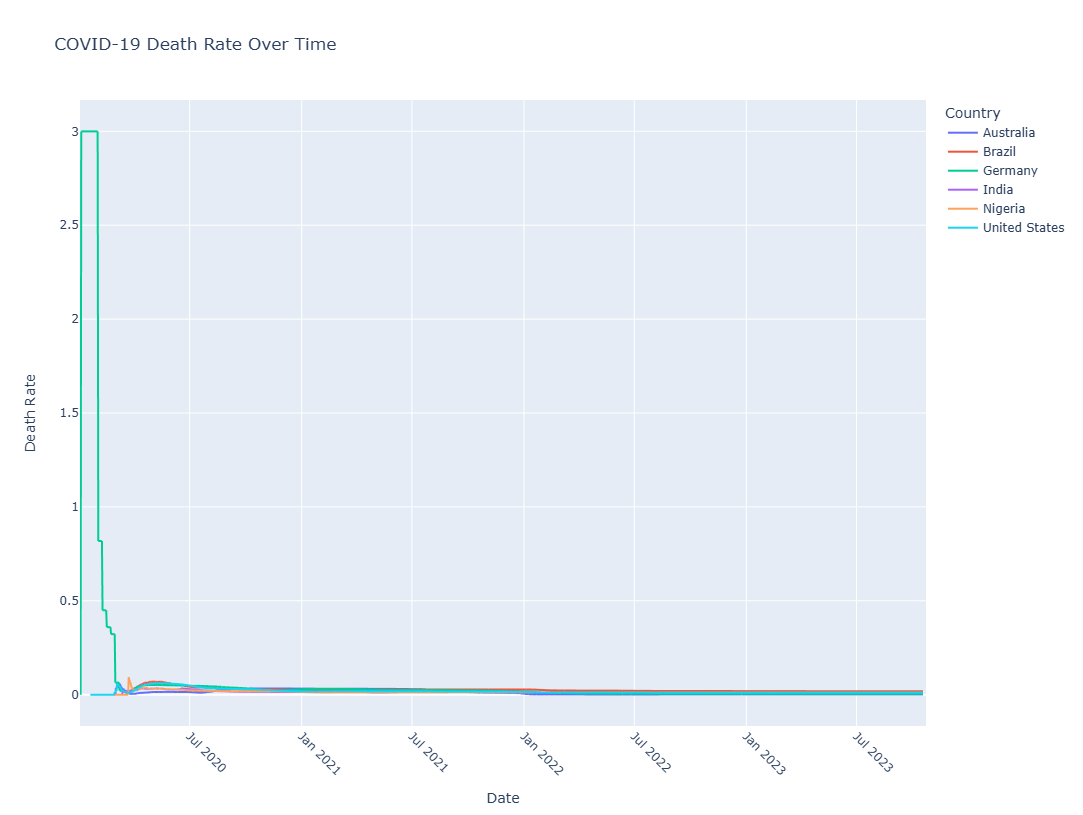

In [13]:
import pandas as pd
import plotly.express as px
# Computing the death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Filter data for selected countries
df_selected = df[df['location'].isin(countries)]

# Create an interactive line plot
fig = px.line(df_selected, x='date', y='death_rate', color='location', 
              title="COVID-19 Death Rate Over Time")

# Customize layout for fullscreen effect
fig.update_layout(xaxis_title="Date", yaxis_title="Death Rate",
                  xaxis=dict(tickangle=45),
                  legend_title="Country",
                  height=800, width=1400)

# Show interactive plot
fig.show()


### Inferences

1. Germany had a considerably higher death rate in the beginning of January 2020.

2. The trend for the death rate shows a decrease in the deaths related to COVID-19 over the years.

3. The period between January and July 2020 experienced the highest death rate. This could possibly have resulted from the vaccinations not being rolled out yet.



## Analysis of the Average Total COVID-19 Cases Per Country
### Plot

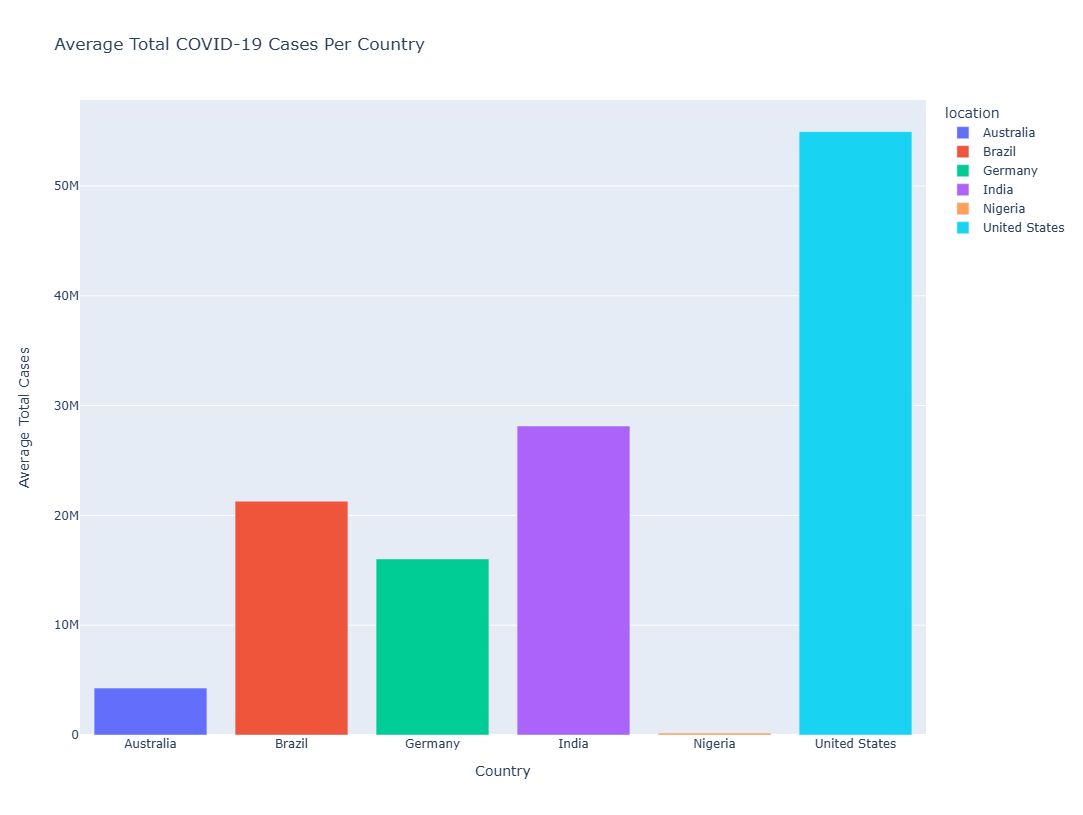

In [14]:
import pandas as pd
import plotly.express as px

# Filter data for selected countries
df_selected = df[df['location'].isin(countries)]

# Group by country and calculate the average total cases
df_grouped = df_selected.groupby('location', as_index=False)['total_cases'].mean()

# Create an interactive bar chart
fig = px.bar(df_grouped, x='location', y='total_cases', 
             title="Average Total COVID-19 Cases Per Country", 
             color='location')

# Customize layout for readability
fig.update_layout(xaxis_title="Country", yaxis_title="Average Total Cases",
                  height=800, width=1400)

# Show the interactive plot
fig.show()


### Inferences

1. Nigeria had the lowest average total cases when compared to the other countries.

2. The United States had the highest average total cases, when compared to India, Germany, Brazil, Australia and Nigeria.

3. The high number of cases recorded in Brazil and the United States show that the COVID-19 pandemic hit the Americas quite hard.

## Analysis of the people vaccinated over time
### Plot

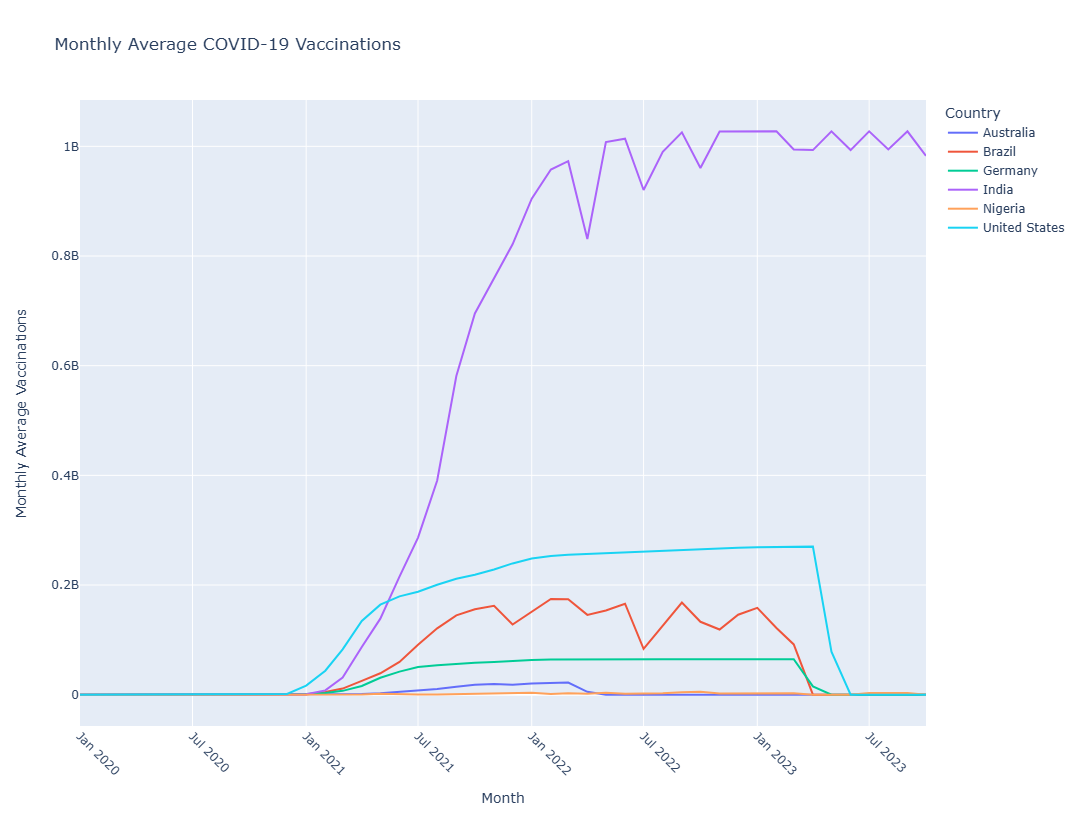

In [15]:
import pandas as pd
import plotly.express as px

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month for grouping
df['year_month'] = df['date'].dt.to_period('M')  # Format: YYYY-MM

# Compute monthly averages for people vaccinated
df_selected = df[df['location'].isin(countries)].copy()
df_monthly_avg = df_selected.groupby(['location', 'year_month'])['people_vaccinated'].mean().reset_index()

# Convert 'year_month' back to a readable date format
df_monthly_avg['year_month'] = df_monthly_avg['year_month'].astype(str)

# Create an interactive line plot for monthly averages
fig = px.line(df_monthly_avg, x='year_month', y='people_vaccinated', color='location', 
              title="Monthly Average COVID-19 Vaccinations")

# Customize layout
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Monthly Average Vaccinations",
    xaxis=dict(tickangle=45),
    legend_title="Country",
    height=800, width=1400
)

# Show interactive plot
fig.show()


### Inferences

1. India had the highest number of vaccinations per month, when compared to Germany, the United States, Brazil, Nigeria and Australia.
  
2. Nigeria had the highest number of vaccinations per month, when compared to Germany, the United States, Brazil, India and Australia.

3. The trend shows a growth of vaccinations from January 2021 with the peak being in the year 2022.

## Analysis of Monthly Average COVID-19 Vaccinations per Hundred
### Plot

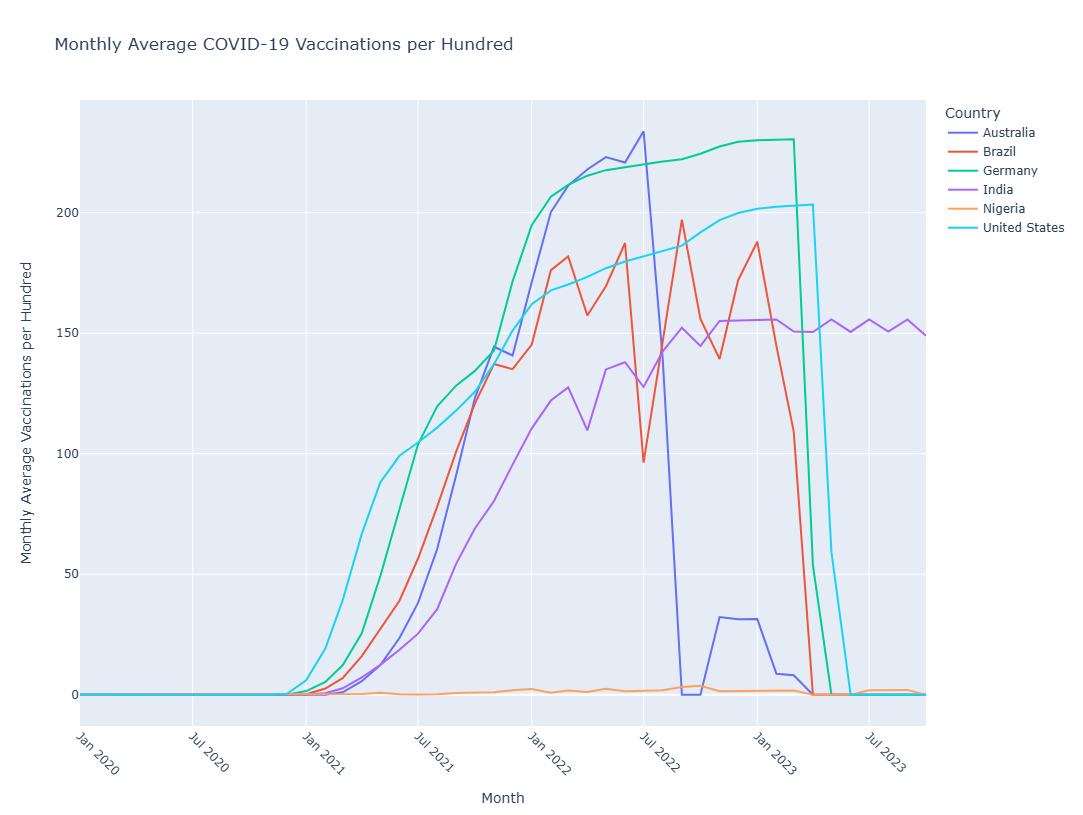

In [16]:
import pandas as pd
import plotly.express as px

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month for grouping
df['year_month'] = df['date'].dt.to_period('M')  # Format: YYYY-MM

# Compute monthly averages for vaccinations per hundred
df_selected = df[df['location'].isin(countries)].copy()
df_monthly_avg = df_selected.groupby(['location', 'year_month'])['total_vaccinations_per_hundred'].mean().reset_index()

# Convert 'year_month' back to a readable date format
df_monthly_avg['year_month'] = df_monthly_avg['year_month'].astype(str)

# Create an interactive line plot for monthly averages
fig = px.line(df_monthly_avg, x='year_month', y='total_vaccinations_per_hundred', color='location', 
              title="Monthly Average COVID-19 Vaccinations per Hundred")

# Customize layout for clarity
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Monthly Average Vaccinations per Hundred",
    xaxis=dict(tickangle=45),
    legend_title="Country",
    height=800, width=1400
)

# Show interactive plot
fig.show()


### Inferences

1. Australia had its highest monthly vaccination per hundred in July 2022, before the trend dipping to almost zero in September 2022.

2. Nigeria shows a generally low vaccination per hundred.

3. The vaccination trend for the United States, India, Australia, Germany and Brazil were highly unstable in the year 2022.

# THE END